# Space Analysis - A Story
# Final Report

### Little NASA (Group 9): Vedant Srivastava, Weibo Chen, Xinyu Zhao

# Introduction

Have you ever looked up at the sky and wondered, is our planet Earth the only place with life on it? The answer to that question is, probably not. With this arises the other question, which of the planets out there can actually support life on it? That time is not far when humans too might be able to / have to start living on planets other than Earth.
    
With this comes the significance of this project. Back in 2009, NASA launched The Kepler Space Observatory, a NASA-built satellite for space observation. As mentioned by NASA, the satellite is dedicated to finding exoplanets or extrasolar planet which by definition is a planet outside the Solar System. The ultimate goal of this exploration is the posibility of finding other habitable planets, besides our own. The telescope within the satellite has remained in service since 2014 on an extended mission and NASA consistently releases the data of it for public research interest. 

We took this data as our working dataset of the project. Through manipulation of this data, we somewhat played the roles of amateur astronomers, in hopes of finding out which of the key components identify an astral body as an exoplanet and then predict the status of such other astral bodies based on what we have learnt.

## Research Interests

Our project research questions are devided into 5 main parts:
1. How is the proportion of exoplanets being confirmed in the existing literature but disconfirmed by measurements from Kepler? How about the other way round?
2. How is the koi_score determined? Which parameters contribute the koi_score generation? Will the Transit Properties weight more in the determination of koi_score than the Stellar Parameters? Currently, we suppose the key predictors are koi_period, koi_impact, koi_duration, koi_prad, koi_teq, koi_smass and koi_sage, will that be the case? 
3. What regression models can we create? Which regression model will be the best chioce?
4. Are these models really good for the explanatory and prediction?
5. Still there are some KOI(Kepler Objects of Interest, astral bodies in Kepler mission) left undetermined, can we use our prediction model to make a reasonable guess of a given KOI being an exoplanet or not?

The objectives for our project will be:
1. To see the proportion of the matched and mismatched classification of celestial bodies between previous archives and by Kepler Data Analysis score.
2. To determine which parameters contribute the determination of a celestial body as an exoplanet or not based on literature review. In detail, we would like to find out how koi_score was determined by parametes from transit properties and stellar properties.
3. To run the descriptive statistics for our data and summarize the characteristics of our variables.
4. To use histogram to visualize numeric variables in our datasets.
5. To build regression models.
6. To visualize the model diagnostics.
7. To split data into two parts, one with determined koi_score (model building set), one without (to-predict set). We will build and improve our prediction model from the model building dataset and then apply the model into the to-predict dataset to see in which category a certain celestial body falls. 


# Data

## Section 1: Data Dictionary

*Variables are separated into different sections for better understanding*<br>
*Descriptions are captured from NASA Exoplanet Science Institute*<br>
https://exoplanetarchive.ipac.caltech.edu/docs/API_kepcandidate_columns.html <br>

Our focus is to build a model for classifying an astral body. We decide to use the following three categories of variables to build our predicting model:

**Identification Variable**
* kepid: Target identification number, as listed in the Kepler Input Catalog (KIC).
* kepoi_name: A number used to identify and track a Kepler Object of Interest (KOI).  
* kepler_name: Kepler number name in the form "Kepler-N," plus a lower-case letter, identifying the planet. 
* koi_disposition: The category of this KOI from the Exoplanet Archive. Current values are CANDIDATE, FALSE POSITIVE, NOT DISPOSITIONED or CONFIRMED.
* koi_pdisposition: The pipeline flag that designates the most probable physical explanation of the KOI. Typical values are FALSE POSITIVE, NOT DISPOSITIONED, and CANDIDATE. 
* koi_score: A value between 0 and 1 that indicates the confidence in the KOI disposition. For CANDIDATEs, a higher value indicates more confidence in its disposition, while for FALSE POSITIVEs, a higher value indicates less confidence in that disposition. 
* koi_fpflag_nt: Like Flag	A KOI whose light curve is not consistent with that of a transiting planet.
* koi_fpflag_ss: A KOI that is observed to have a significant secondary event, transit shape, or out-of-eclipse variability, which indicates that the transit-like event is most likely caused by an eclipsing binary.
* koi_fpflag_co: The source of the signal is from a nearby star.
* koi_fpflag_ec: The KOI shares the same period and epoch as another object and is judged to be the result of flux contamination in the aperture or electronic crosstalk.
* koi_disp_prov: Disposition Provenance.  

**Transit Properties**
* koi_period: The interval between consecutive planetary transits.
* koi_time0bk: The time corresponding to the center of the first detected transit in Barycentric Julian Day (BJD) minus a constant offset of 2,454,833.0 days. 
* koi_time0: The time corresponding to the center of the first detected transit in Barycentric Julian Day (BJD).
* koi_eccen: Eccentricity Value. 
* koi_longp: Longitude of Periastron.
* koi_impact: The sky-projected distance between the center of the stellar disc and the center of the planet disc at conjunction.
* koi_duration:The duration of the observed transits. 
* koi_ingress: The time between first and second contact of the planetary transit.
* koi_depth: The fraction of stellar flux lost at the minimum of the planetary transit. 
* koi_ror: The planet radius divided by the stellar radius.
* koi_srho: Fitted stellar density is a direct observable from the light curve that, in the small-planet approximation, depends only on the transit's period, depth, and duration.
* koi_fittype: Type of Fit for planetary parameters.<br>
    * none
    * LS: Least Squares fit<br>
    * MCMC: Markov Chain Monte Carlo fit<br>
    * LS+MCMC: Least Squares Fit with Markov Monte Carlo error bars<br>
    * DV: Data Validation pipeline fit
* koi_prad: The radius of the planet. 
* koi_sma: Half of the long axis of the ellipse defining a planet's orbit.
* koi_incl: The angle between the plane of the sky (perpendicular to the line of sight) and the orbital plane of the planet candidate.
* koi_teq: Approximation for the temperature of the planet. 
* koi_insol: Insolation flux is another way to give the equilibrium temperature.
* koi_dor: The distance between the planet and the star at mid-transit divided by the stellar radius. 

**Stellar Parameters**
* koi_steff: The photospheric temperature of the star.
* koi_slogg: The base-10 logarithm of the acceleration due to gravity at the surface of the star.
* koi_smet: The base-10 logarithm of the Fe to H ratio at the surface of the star, normalized by the solar Fe to H ratio.
* koi_srad: The photospheric radius of the star.
* koi_smass: The mass of the star.
* koi_sage: The age of the star.
* koi_sparprov: A flag describing the source of the stellar parameters.  

### Determination of variables we interested

Based on our literature reivew, we finalized our variables as the followings:

**Dependent Variable**:

* koi_score: A value between 0 and 1 that indicates the confidence in the KOI disposition. For CANDIDATEs, a higher value indicates more confidence in its disposition, while for FALSE POSITIVEs, a higher value indicates less confidence in that disposition. 

**Independent Variables**:

* koi_period: The interval between consecutive planetary transits.
* koi_duration:The duration of the observed transits. 
* koi_depth: The fraction of stellar flux lost at the minimum of the planetary transit. 
* koi_srho: Fitted stellar density is a direct observable from the light curve that, in the small-planet approximation, depends only on the transit's period, depth, and duration.
* koi_fittype: Type of Fit for planetary parameters.
* koi_prad: The radius of the planet. 
* koi_sma: Half of the long axis of the ellipse defining a planet's orbit.
* koi_incl: The angle between the plane of the sky (perpendicular to the line of sight) and the orbital plane of the planet candidate.
* koi_teq: Approximation for the temperature of the planet. 
* koi_dor: The distance between the planet and the star at mid-transit divided by the stellar radius. 
* koi_steff: The photospheric temperature of the star.
* koi_slogg: The base-10 logarithm of the acceleration due to gravity at the surface of the star.
* koi_smet: The base-10 logarithm of the Fe to H ratio at the surface of the star, normalized by the solar Fe to H ratio.
* koi_srad: The photospheric radius of the star.
* koi_smass: The mass of the star.

## Section 2: Data Cleaning

The data is downloaded from NASA Exoplanet Archive webpage:(https://exoplanetarchive.ipac.caltech.edu/docs/data.html). The data comes in a well-formatted, decent form, no heavy data cleaning work is required. We manipulate the dataset based on our own research interests: filtering out irrelavent variables, dropping the NULL data input, assigning the correct column type for each column, creating dummy variables for categorical variables (dummy variables creating is done in regression part).

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
nasarawdata=pd.read_csv('Nasa.csv')

In [3]:
nasarawdata.shape

(9564, 141)

####  Variable Selection

In [4]:
regvarlist=[#Project Disposition Columns
             'koi_score',
            #Transit, and Planet Properties
            'koi_period','koi_duration','koi_depth',
            'koi_srho','koi_fittype','koi_prad','koi_sma','koi_incl','koi_teq','koi_dor',
            #Stellar Parameters
            'koi_steff','koi_slogg','koi_smet','koi_srad','koi_smass']
nasadataregvar=nasarawdata[regvarlist].copy()

In [5]:
nasadataregvar.dtypes

koi_score       float64
koi_period      float64
koi_duration    float64
koi_depth       float64
koi_srho        float64
koi_fittype      object
koi_prad        float64
koi_sma         float64
koi_incl        float64
koi_teq         float64
koi_dor         float64
koi_steff       float64
koi_slogg       float64
koi_smet        float64
koi_srad        float64
koi_smass       float64
dtype: object

All columns are read in correct types.

In [6]:
#Delete observations contain any null values
nasadatareg=nasadataregvar.dropna()
nasadatareg.shape

(7989, 16)

In total, we have 7989 vaild oberstavions. We have 1 dependent variable and 15 independent variables.

# Data Analysis

## Objective 1: Literature & KOI concordance analysis

From prelinimary literature review, we got the meaning of all the columns so as to solve the first the question: How is the proportion of exoplanets being confirmed in the existing literature but disconfirmed by measurements from Kepler? How about the other way round?

We used raw data to conduct this analysis.

In [7]:
kepmatchstat=nasarawdata[['kepid','koi_disposition','koi_pdisposition']].copy()
kepmatchstat.groupby(["koi_disposition", "koi_pdisposition"]).size()

koi_disposition  koi_pdisposition
CANDIDATE        CANDIDATE           2420
CONFIRMED        CANDIDATE           2296
                 FALSE POSITIVE         7
FALSE POSITIVE   CANDIDATE              1
                 FALSE POSITIVE      4840
dtype: int64

Because in Kepler mission, to be conservative, no 'CONFIRMED' value for koi_pdisposition column, we would treat observations having 'CONFRIMED' in koi_disposition and 'FALSE POSITIVE' in koi_pdisposition, and observations having 'FALSE POSITIVE' in koi_disposition and 'CANDIDATE' in koi_pdisposition as mismatching.

The python output indicates that there are in total 8 mismatching cases out of 9564 observations, an extreme similarity between archive-determined exoplanets and Kepler exoplanet determining algorithm. The result brings us confidence to use literature derived key parameters to construct (or deduct) the algorithm that the Kepler mission might use.

## Objective 2 Predicting Model

### Section 1 Linear regression modeling

### 2.1.1 Descriptive Statistics 

In [8]:
nasadatareg.head(5)

koi_score  koi_period  koi_duration  koi_depth  koi_srho koi_fittype  \
0      1.000    9.488036       2.95750      616.0   3.20796     LS+MCMC   
1      0.969   54.418383       4.50700      875.0   3.02368     LS+MCMC   
2      0.000   19.899140       1.78220    10800.0   7.29555     LS+MCMC   
3      0.000    1.736952       2.40641     8080.0   0.22080     LS+MCMC   
4      1.000    2.525592       1.65450      603.0   1.98635     LS+MCMC   

   koi_prad  koi_sma  koi_incl  koi_teq  koi_dor  koi_steff  koi_slogg  \
0      2.26   0.0853     89.66    793.0   24.810     5455.0      4.467   
1      2.83   0.2734     89.57    443.0   77.900     5455.0      4.467   
2     14.60   0.1419     88.96    638.0   53.500     5853.0      4.544   
3     33.46   0.0267     67.09   1395.0    3.278     5805.0      4.564   
4      2.75   0.0374     85.41   1406.0    8.750     6031.0      4.438   

   koi_smet  koi_srad  koi_smass  
0      0.14     0.927      0.919  
1      0.14     0.927      0.919  
2     -0.18     0.868      0.961  
3     -0.52     0.791      0.836  
4      0.07     1.046      1.095

#### Data description

In [9]:
nasadatareg.describe().T

count          mean           std         min          25%  \
koi_score     7989.0      0.483991      0.477016     0.00000     0.000000   
koi_period    7989.0     37.096922     86.649399     0.25982     2.420883   
koi_duration  7989.0      5.365737      6.306982     0.05200     2.414300   
koi_depth     7989.0  26667.032169  85076.421665     0.00000   162.000000   
koi_srho      7989.0      3.572756     18.413061     0.00004     0.207140   
koi_prad      7989.0     27.861840    312.143445     0.08000     1.410000   
koi_sma       7989.0      0.159488      0.237118     0.00590     0.035100   
koi_incl      7989.0     82.054223     15.187126     5.26000    83.020000   
koi_teq       7989.0   1141.355238    843.885265    92.00000   612.000000   
koi_dor       7989.0     37.081845     81.499533     1.00600     4.870000   
koi_steff     7989.0   5691.676180    787.974741  2661.00000  5312.000000   
koi_slogg     7989.0      4.320037      0.422118     0.04700     4.230000   
koi_smet      7989.0     -0.114327      0.279181    -1.98000    -0.260000   
koi_srad      7989.0      1.691042      6.106637     0.10900     0.827000   
koi_smass     7989.0      1.015264      0.339331     0.09400     0.842000   

                      50%          75%            max  
koi_score        0.374000     0.999000       1.000000  
koi_period       7.580629    23.815784    1071.232624  
koi_duration     3.733000     5.953000     138.540000  
koi_depth      449.000000  2000.000000  922000.000000  
koi_srho         0.846330     2.461400     918.752390  
koi_prad         2.470000    19.660000   26042.900000  
koi_sma          0.074600     0.159900       2.152500  
koi_incl        88.110000    89.580000      90.000000  
koi_teq        938.000000  1435.000000   14667.000000  
koi_dor         13.210000    32.180000    1603.000000  
koi_steff     5761.000000  6098.000000   15896.000000  
koi_slogg        4.438000     4.544000       5.364000  
koi_smet        -0.080000     0.070000       0.560000  
koi_srad         0.997000     1.314000     229.908000  
koi_smass        0.970000     1.097000       3.686000

The descriptive statstics give us a brief understanding of our data. The percentile data tells us that our data have heavy skewness and extreme values. We will explore more insights in the following analyses.

#### Independent variable visualizations

In [10]:
hisvarlist=['koi_period','koi_duration','koi_depth','koi_srho','koi_prad','koi_sma','koi_incl','koi_teq','koi_dor',
            'koi_steff','koi_slogg','koi_smet','koi_srad','koi_smass']

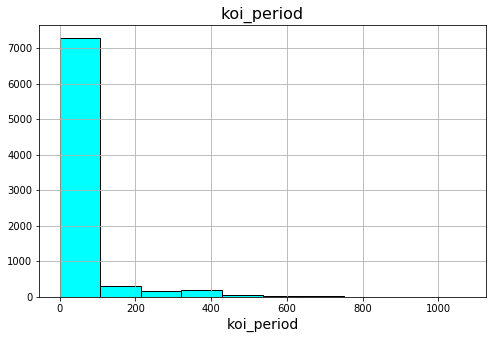

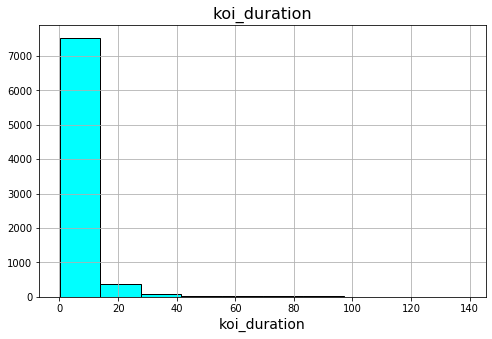

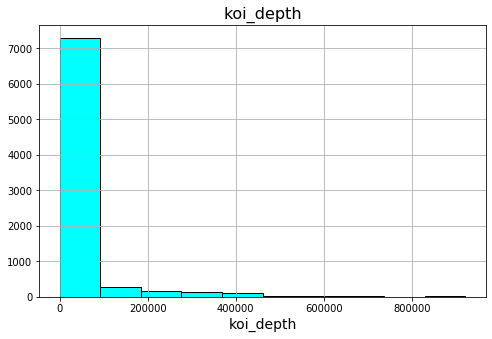

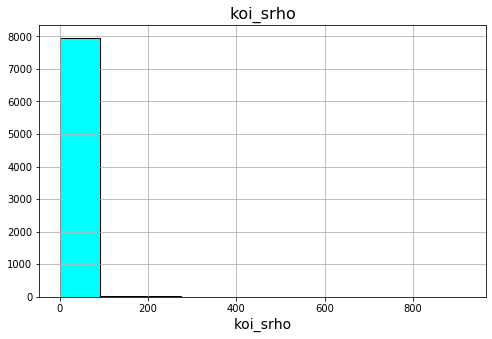

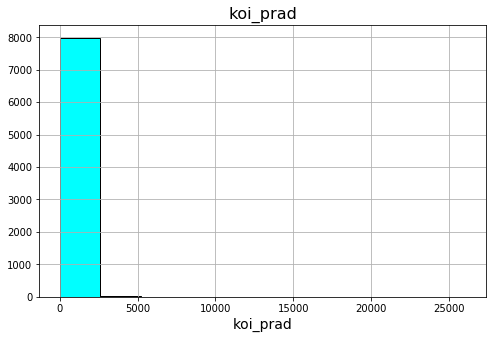

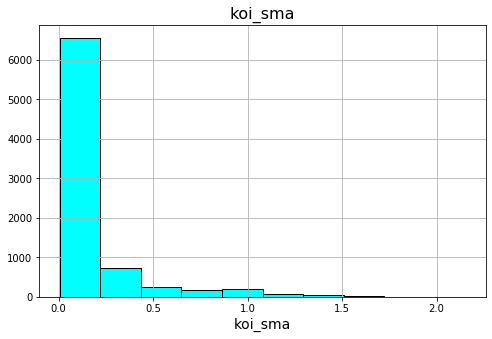

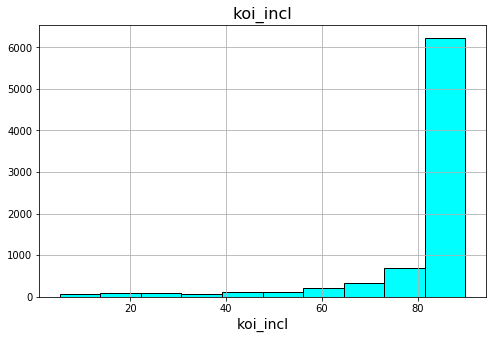

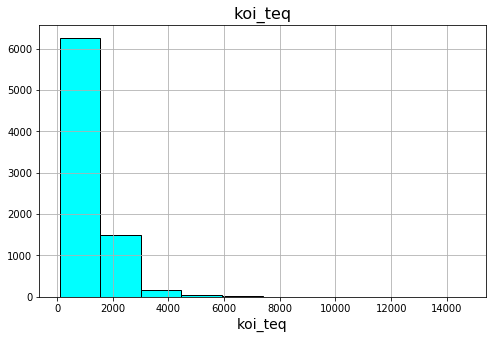

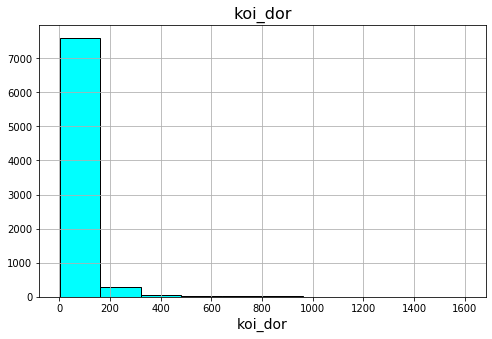

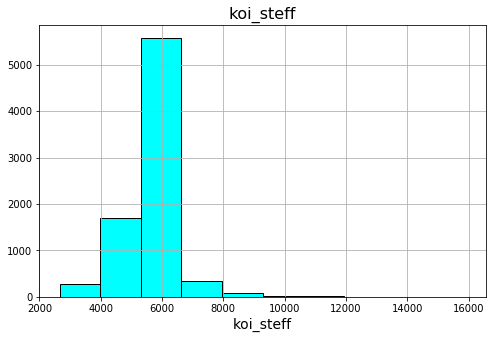

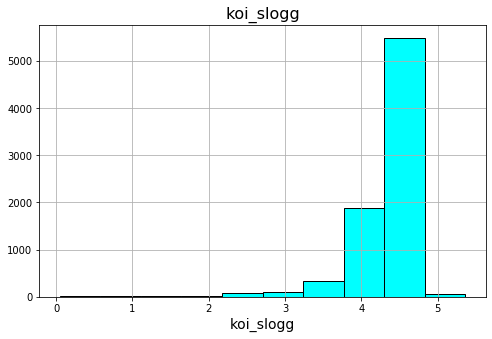

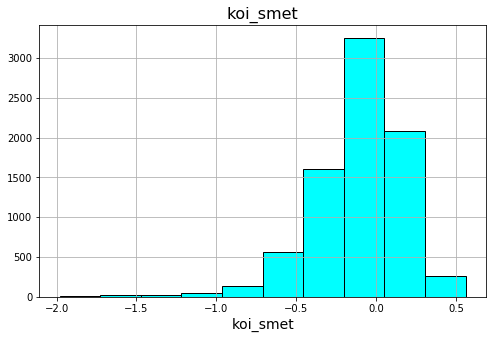

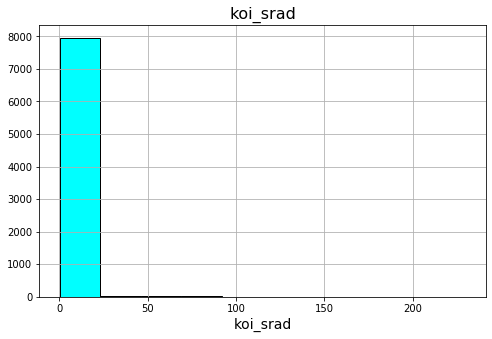

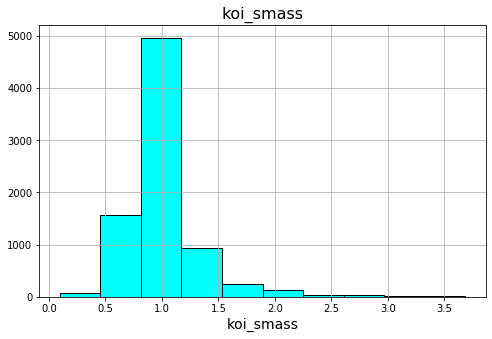

In [11]:
for i in hisvarlist:
    plt.figure(figsize=(8,5))
    plt.title("{}".format(i),fontsize=16)
    plt.hist(nasadatareg[i],color='cyan',edgecolor='k')
    plt.grid(True)
    plt.xlabel(i,fontsize=14)
    plt.show()

We visualized each column (only continuous one) by plotting the histogram, we found that most of the variables are heavily skewed.<br>
* koi_period, koi_duration, koi_depth, koi_srho, koi_fittype, koi_prad, koi_sma, koi_teq, koi_dor, koi_steff, koi_srad, koi_smass are **right-skewed**
* koi_incl, koi_slogg, koi_smet are **left-skewed**

Such visualizations gave us an impression that for our modeling purpose, perhaps applying certain transformations on the indepedent variables is better than using the identical form.

#### Dependent variable visualization

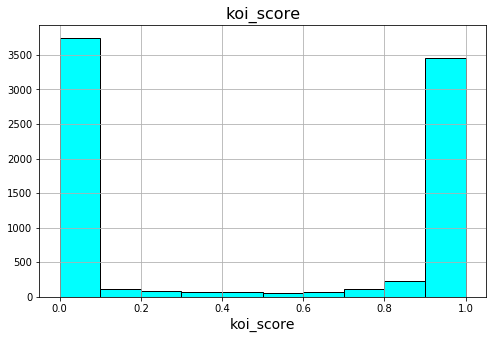

In [12]:
plt.figure(figsize=(8,5))
plt.title("koi_score",fontsize=16)
plt.hist(nasadatareg['koi_score'],color='cyan',edgecolor='k')
plt.grid(True)
plt.xlabel("koi_score",fontsize=14)
plt.show()

The vast majority of the koi_score is 0 and 1.
<br>
The violation of normal distribution indicates that a linear regression model might not be that robust.
<br>
Moreover, the nearly dichotomized koi_score indicates a logistic regression model could be a good alternative to serve our purpose. 

#### Visualizing the association between Dependent variable and Independent variables

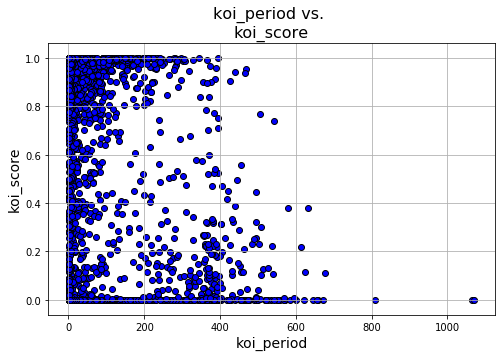

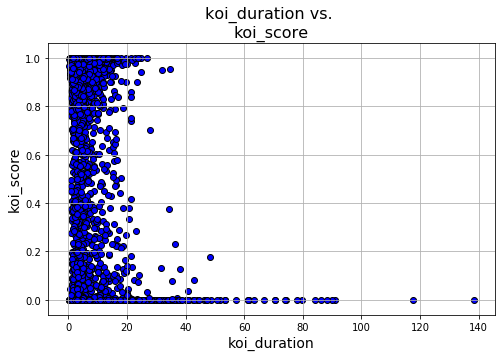

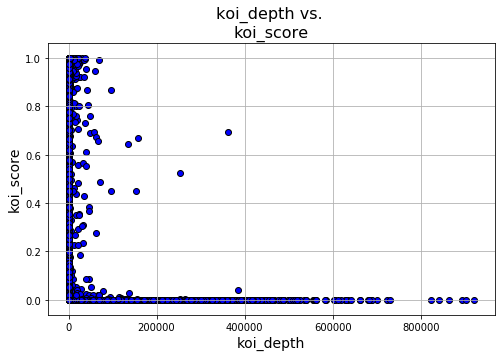

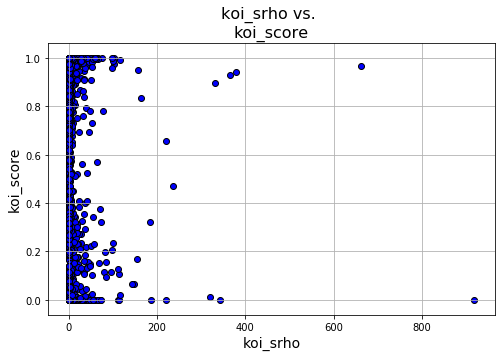

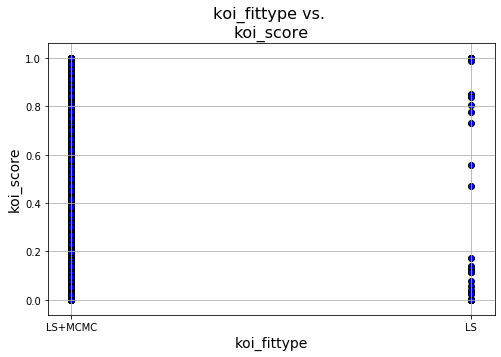

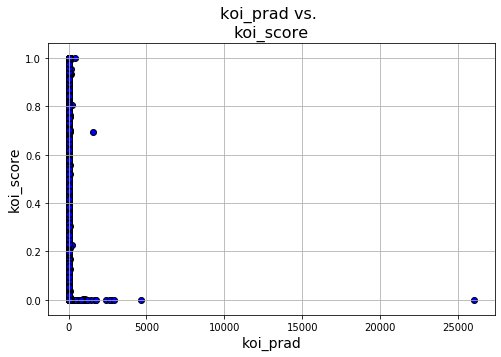

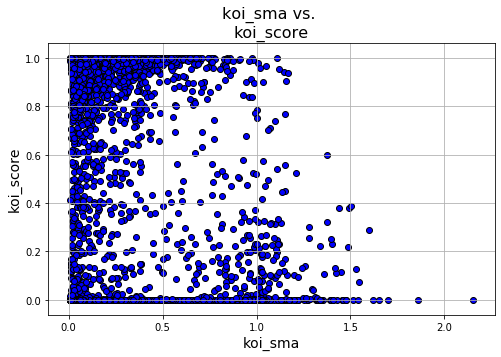

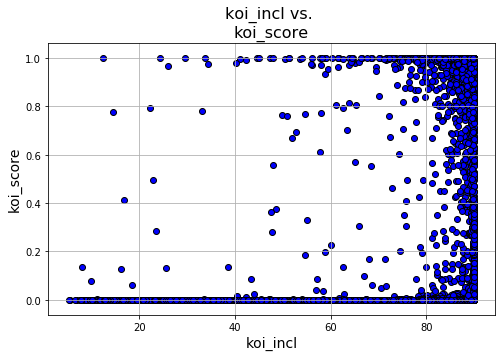

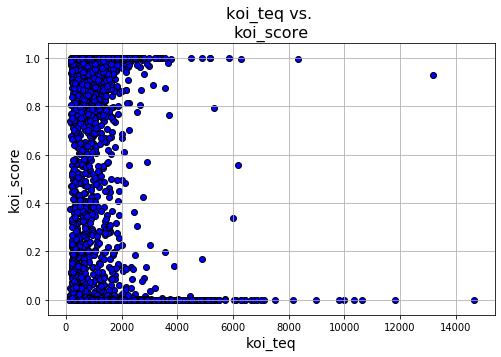

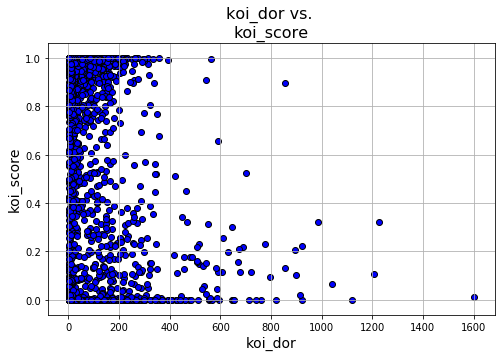

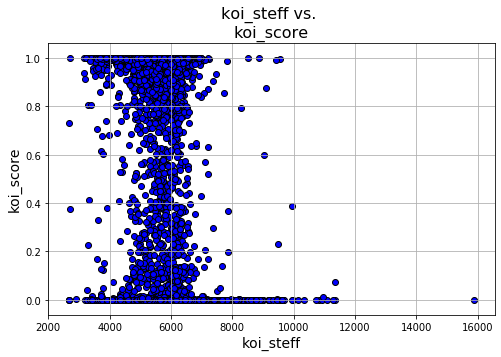

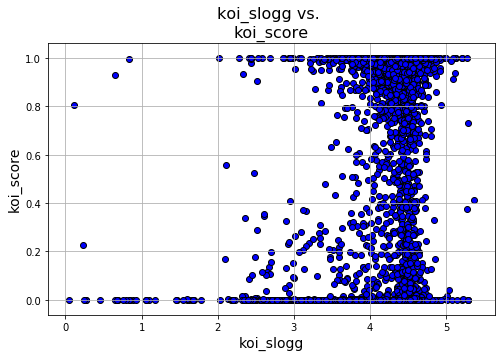

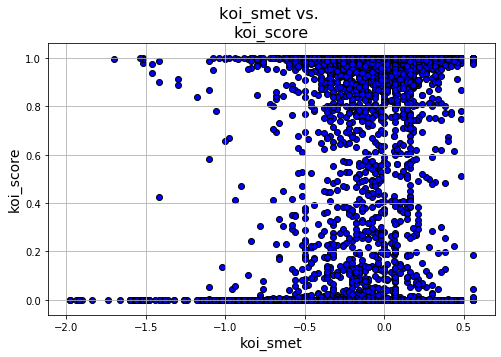

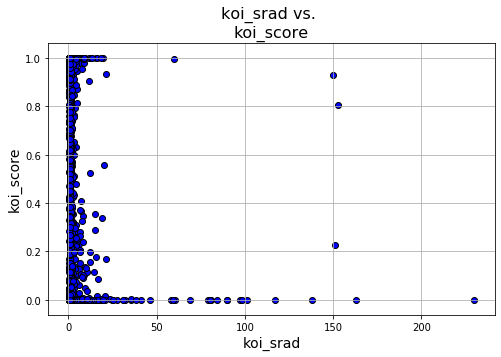

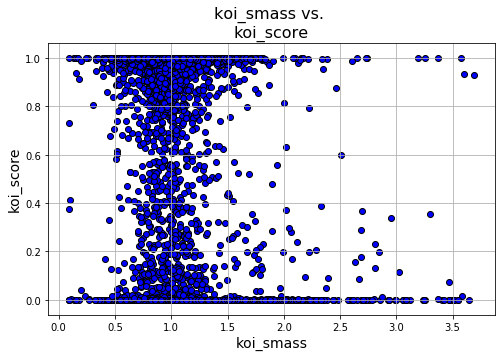

In [13]:
for c in nasadatareg.columns[1:]:
    plt.figure(figsize=(8,5))
    plt.title("{} vs. \nkoi_score".format(c),fontsize=16)
    plt.scatter(x=nasadatareg[c],y=nasadatareg['koi_score'],color='blue',edgecolor='k')
    plt.grid(True)
    plt.xlabel(c,fontsize=14)
    plt.ylabel('koi_score',fontsize=14)
    plt.show()

For transit property plots (plots before _koi_steff vs. koi_score_ ), most of them are in 'C' shape, showing plenty of observations clustered around the upper limit (koi_score=1) and the lower limit (koi_score=0).

For stellar parameter plots (plots after _koi_steff vs. koi_score_ ), most of them are in 'I' shape. Same as transit property plots, lots of the observations are clustered around the upper limit and the lower limit; the difference is the observations are more scattered around than in transit property plots.

Also, the scatterplots show some outliers,
* koi_period vs. koi_score, bottom right corner
* koi_duration vs. koi_score, bottom right corner
* koi_srho vs. koi_score, bottom right corner and upper right corner
* koi_prad vs. koi_score, bottom right corner
* koi_teq vs. koi_score, bottom right corner and upper right corner
* koi_dor vs. koi_score, bottom right corner
* koi_steff vs. koi_score, bottom right corner
* koi_slogg vs. koi_score, upper left corner
* koi_srad vs. koi_score, bottom right corner

These are not good signs for linear regression because from the scatterplots hardly can we find a linear trend line to describe the relationship of koi_score along with each paramter (a perpendicular line to the X-Axis is not a feasible trend), and our linear model may bias becasue of the outliers. However, the clustering feature is a good sign for applying logistic regression.

#### Create dummy variables for category variable

In [14]:
nasadatareg2=pd.get_dummies(nasadatareg)
nasadatareg3=nasadatareg2.rename(columns={"koi_fittype_LS+MCMC": "koi_fittype_LS_MCMC"})

#### Correlation matrix

We also want to know about the associations between Dependent variables

In [15]:
nasadatareg3.head()

koi_score  koi_period  koi_duration  koi_depth  koi_srho  koi_prad  \
0      1.000    9.488036       2.95750      616.0   3.20796      2.26   
1      0.969   54.418383       4.50700      875.0   3.02368      2.83   
2      0.000   19.899140       1.78220    10800.0   7.29555     14.60   
3      0.000    1.736952       2.40641     8080.0   0.22080     33.46   
4      1.000    2.525592       1.65450      603.0   1.98635      2.75   

   koi_sma  koi_incl  koi_teq  koi_dor  koi_steff  koi_slogg  koi_smet  \
0   0.0853     89.66    793.0   24.810     5455.0      4.467      0.14   
1   0.2734     89.57    443.0   77.900     5455.0      4.467      0.14   
2   0.1419     88.96    638.0   53.500     5853.0      4.544     -0.18   
3   0.0267     67.09   1395.0    3.278     5805.0      4.564     -0.52   
4   0.0374     85.41   1406.0    8.750     6031.0      4.438      0.07   

   koi_srad  koi_smass  koi_fittype_LS  koi_fittype_LS_MCMC  
0     0.927      0.919               0                    1  
1     0.927      0.919               0                    1  
2     0.868      0.961               0                    1  
3     0.791      0.836               0                    1  
4     1.046      1.095               0                    1

In [16]:
corr = nasadatareg3[nasadatareg3.columns[:-2]].corr()

In [17]:
corr

koi_score  koi_period  koi_duration  koi_depth  koi_srho  \
koi_score      1.000000   -0.072186     -0.174120  -0.301226  0.020904   
koi_period    -0.072186    1.000000      0.351171  -0.047841  0.082579   
koi_duration  -0.174120    0.351171      1.000000   0.088922 -0.087612   
koi_depth     -0.301226   -0.047841      0.088922   1.000000 -0.010635   
koi_srho       0.020904    0.082579     -0.087612  -0.010635  1.000000   
koi_prad      -0.076699   -0.012377      0.021422   0.094870  0.199744   
koi_sma       -0.025709    0.972370      0.388874  -0.053205  0.084325   
koi_incl       0.355126    0.190200     -0.181597   0.044132  0.076104   
koi_teq       -0.302395   -0.350717     -0.185372   0.076358 -0.055869   
koi_dor       -0.015458    0.756177      0.077711  -0.028412  0.339024   
koi_steff     -0.192879    0.024393      0.108268   0.135147 -0.054719   
koi_slogg      0.149555   -0.049899     -0.136338  -0.021213  0.013224   
koi_smet       0.293280   -0.002744     -0.048687  -0.155837  0.000468   
koi_srad      -0.071813    0.015800      0.017021  -0.015826 -0.002456   
koi_smass     -0.157013    0.041720      0.114868   0.044914 -0.028002   

              koi_prad   koi_sma  koi_incl   koi_teq   koi_dor  koi_steff  \
koi_score    -0.076699 -0.025709  0.355126 -0.302395 -0.015458  -0.192879   
koi_period   -0.012377  0.972370  0.190200 -0.350717  0.756177   0.024393   
koi_duration  0.021422  0.388874 -0.181597 -0.185372  0.077711   0.108268   
koi_depth     0.094870 -0.053205  0.044132  0.076358 -0.028412   0.135147   
koi_srho      0.199744  0.084325  0.076104 -0.055869  0.339024  -0.054719   
koi_prad      1.000000 -0.011273 -0.076880  0.117729 -0.008050  -0.003676   
koi_sma      -0.011273  1.000000  0.244449 -0.422086  0.755202   0.052238   
koi_incl     -0.076880  0.244449  1.000000 -0.406246  0.208468  -0.140710   
koi_teq       0.117729 -0.422086 -0.406246  1.000000 -0.324482   0.258035   
koi_dor      -0.008050  0.755202  0.208468 -0.324482  1.000000  -0.032719   
koi_steff    -0.003676  0.052238 -0.140710  0.258035 -0.032719   1.000000   
koi_slogg    -0.157853 -0.094383  0.079345 -0.573068 -0.025906  -0.160692   
koi_smet     -0.022962  0.033764  0.129830 -0.057415  0.013724  -0.024329   
koi_srad      0.156975  0.031859 -0.017785  0.457535  0.012844  -0.113602   
koi_smass     0.072253  0.102745 -0.115540  0.488178  0.009176   0.613123   

              koi_slogg  koi_smet  koi_srad  koi_smass  
koi_score      0.149555  0.293280 -0.071813  -0.157013  
koi_period    -0.049899 -0.002744  0.015800   0.041720  
koi_duration  -0.136338 -0.048687  0.017021   0.114868  
koi_depth     -0.021213 -0.155837 -0.015826   0.044914  
koi_srho       0.013224  0.000468 -0.002456  -0.028002  
koi_prad      -0.157853 -0.022962  0.156975   0.072253  
koi_sma       -0.094383  0.033764  0.031859   0.102745  
koi_incl       0.079345  0.129830 -0.017785  -0.115540  
koi_teq       -0.573068 -0.057415  0.457535   0.488178  
koi_dor       -0.025906  0.013724  0.012844   0.009176  
koi_steff     -0.160692 -0.024329 -0.113602   0.613123  
koi_slogg      1.000000 -0.055415 -0.646063  -0.682634  
koi_smet      -0.055415  1.000000  0.008227   0.241724  
koi_srad      -0.646063  0.008227  1.000000   0.295399  
koi_smass     -0.682634  0.241724  0.295399   1.000000

Correlation matrix is a basic method to view pairwise correlation coefficients. However, it is a little bit hard for distinguishing which pairs are highly correlated. We decide to use the pairwise scatter plots and heatmap for more informative displays.

#### Variable pairwised scatter plots

In [18]:
from seaborn import pairplot

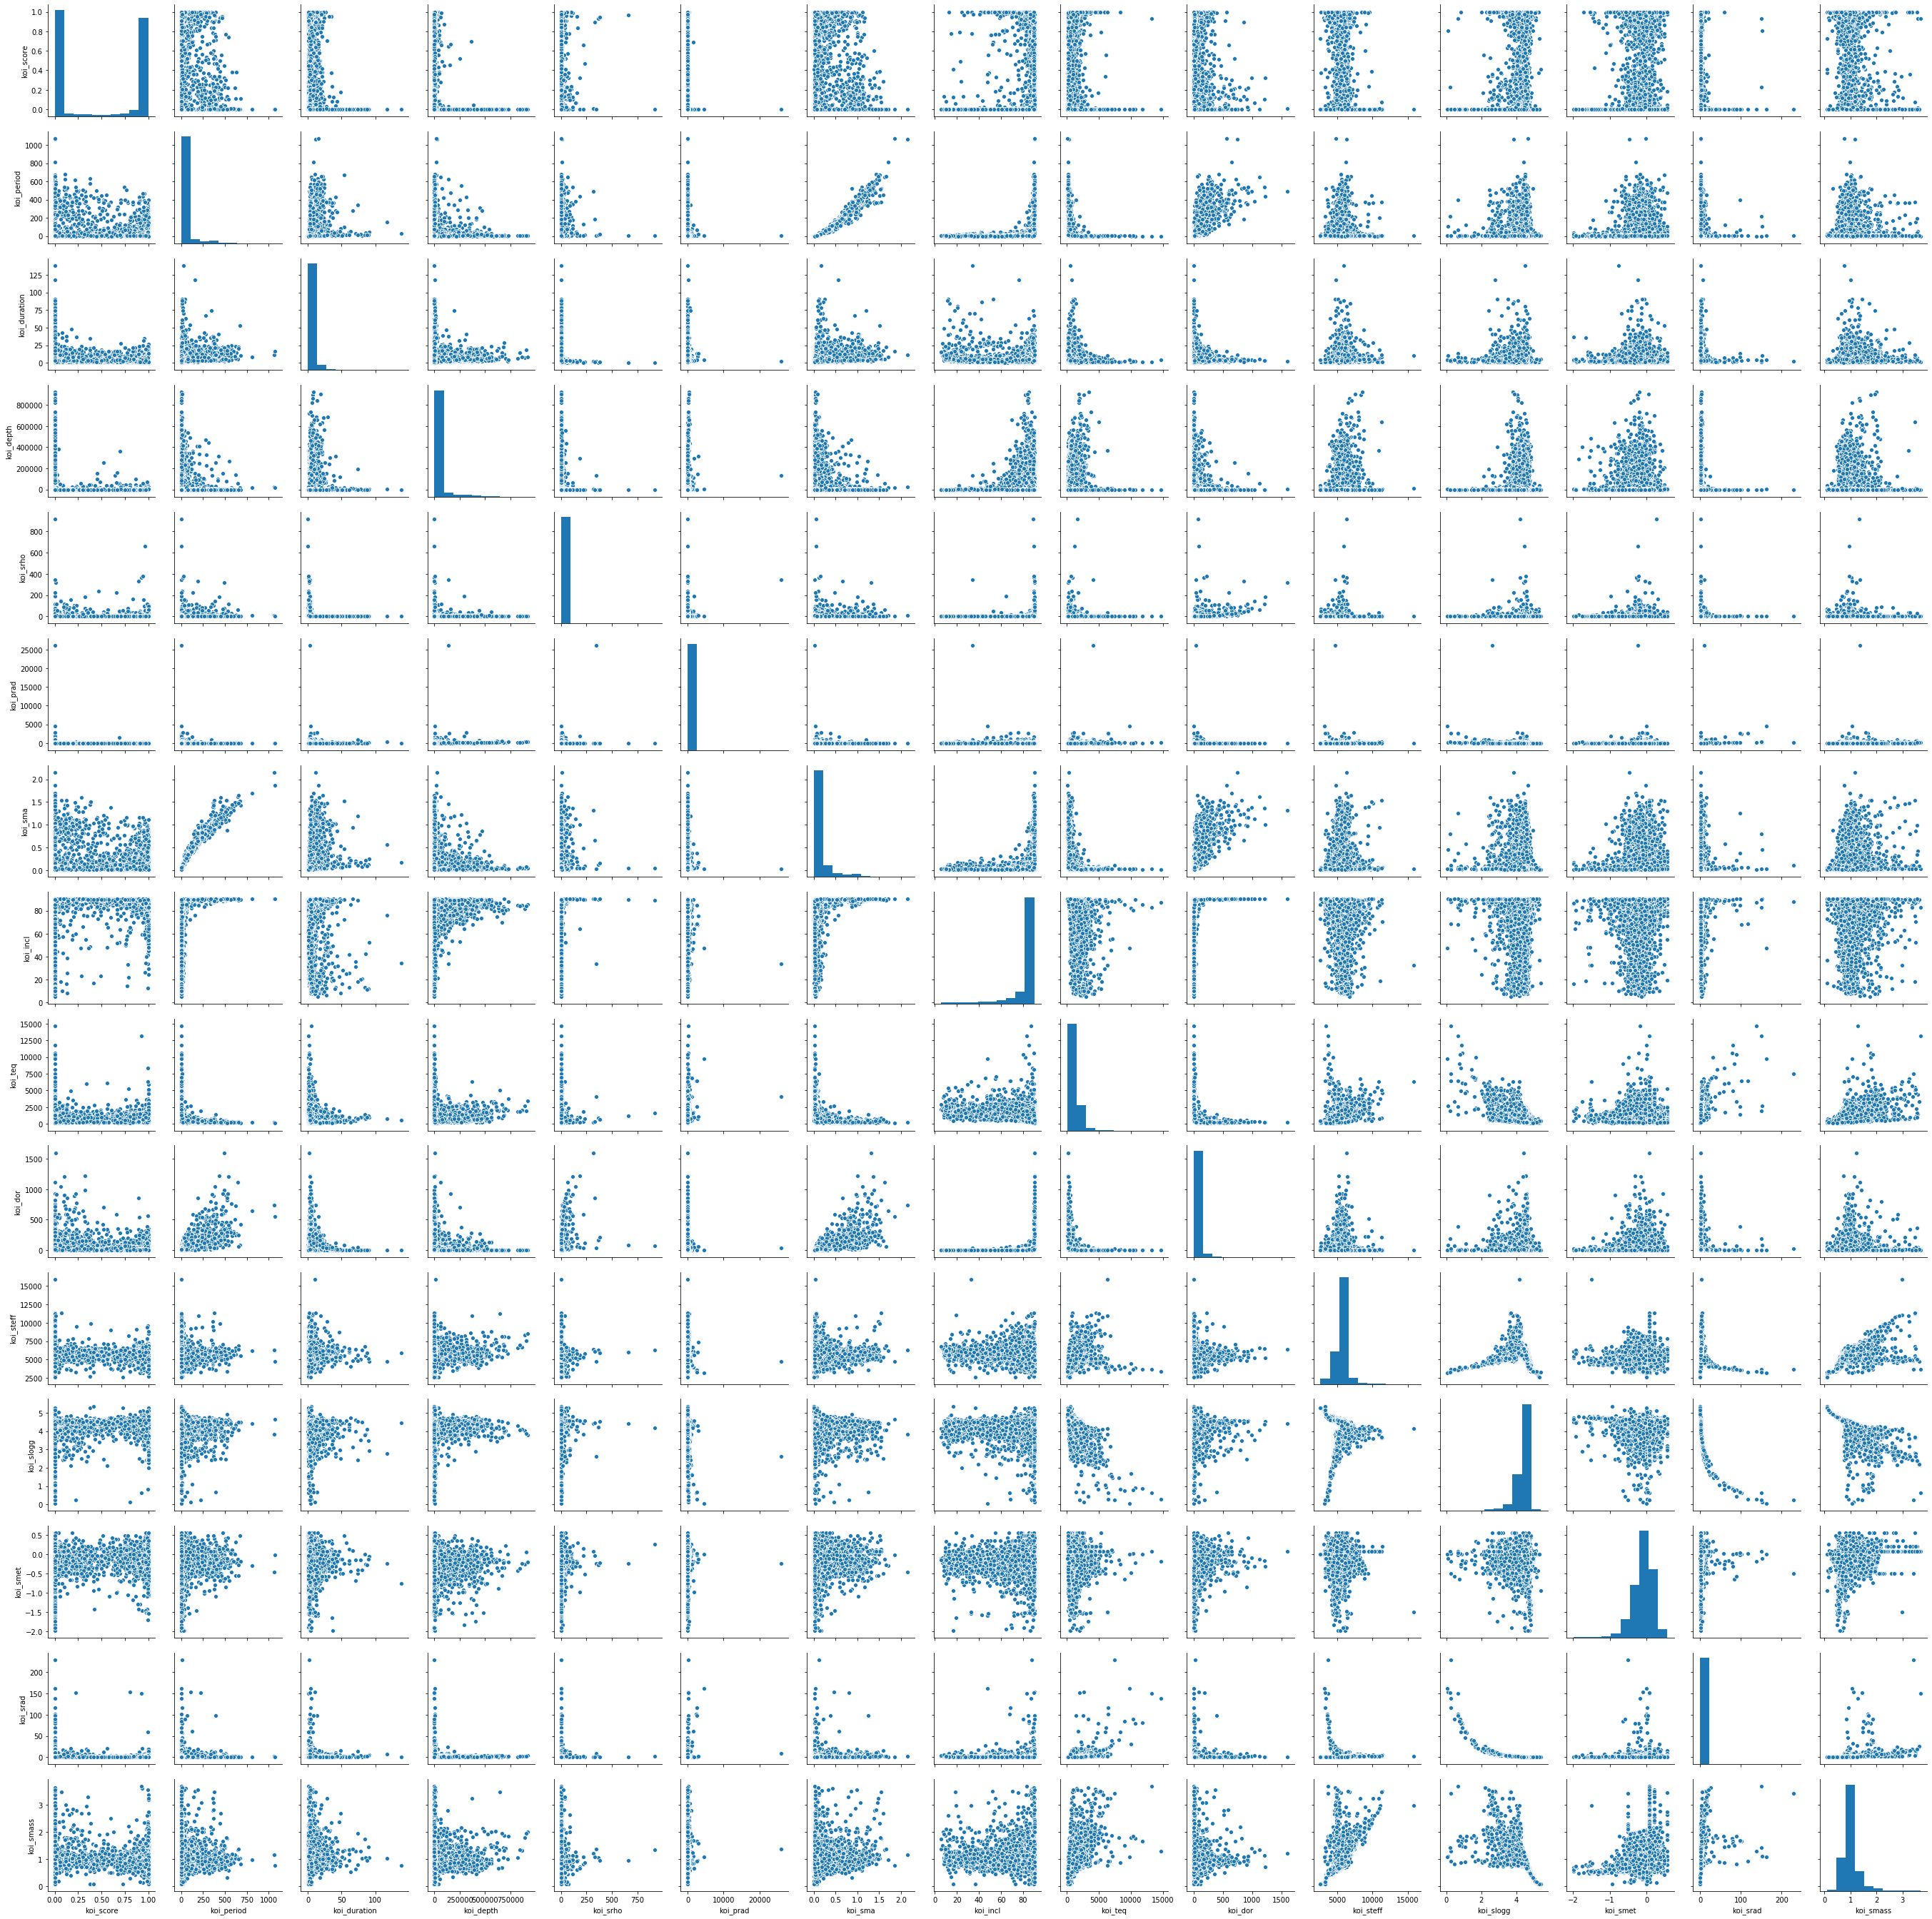

In [19]:
pairplot(nasadatareg3[nasadatareg3.columns[:-2]])

We generate a visualized correlation matrix in scatter plot using _pairplot_ in Seaborn. From this plot matrix we can find some correlated pairs:
* koi_sma vs. koi_period
* koi_srad vs. koi_slogg
* koi_smass vs. koi_slogg
* koi_steff vs. koi_slogg

#### Heatmap method

In [20]:
from statsmodels.graphics.correlation import plot_corr

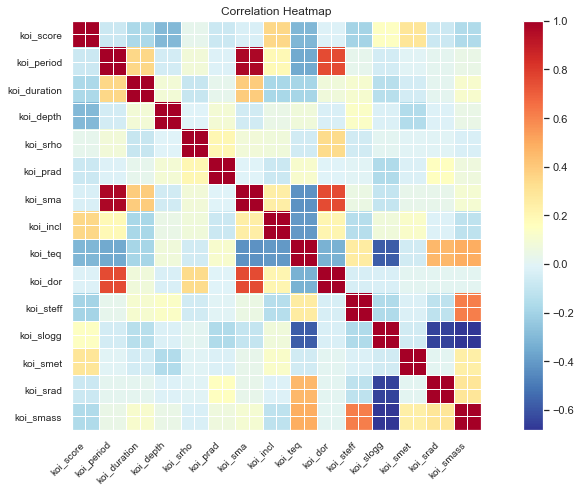

In [21]:
sns.set(rc={'figure.figsize':(12,7)})
fig=plot_corr(corr,xnames=corr.columns,title='Correlation Heatmap')

The heatmap outstandingly helps us to find out which pairs are highly correlated. The girds have deep colors (Both in deep red and in deep blue) indicates the corresponding pairs are highly correlated.
<br>
The highly correlated pairs are: 
* koi_sma vs. koi_period
* koi_dor vs. koi_period
* koi_dor vs. koi_sma
* koi_slogg vs. koi_srad
* koi_slogg vs. koi_smass

We decide to keep all of them into the saturated model although we know that will introduce multicollinearity issue. The reason is that we consider those parameters are crucial based on our literature review. 

### 2.1.2 Modeling

Library statsmodels is used to generate and test our predicting model.

In [22]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

At the beginning, we need to specify the linear model, a **'~'** sign represents the equal sign connecting the dependant variable and independant variables.

In [23]:
model_str = nasadatareg3.columns[0]+' ~ '+'+'.join(nasadatareg3.columns[1:-2])+'+'+nasadatareg3.columns[-1]

In [24]:
model_str

'koi_score ~ koi_period+koi_duration+koi_depth+koi_srho+koi_prad+koi_sma+koi_incl+koi_teq+koi_dor+koi_steff+koi_slogg+koi_smet+koi_srad+koi_smass+koi_fittype_LS_MCMC'

In [25]:
model=smf.ols(formula=model_str, data=nasadatareg3)

In [26]:
fitted = model.fit()

In [27]:
print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:              koi_score   R-squared:                       0.341
Model:                            OLS   Adj. R-squared:                  0.340
Method:                 Least Squares   F-statistic:                     274.8
Date:                Thu, 12 Dec 2019   Prob (F-statistic):               0.00
Time:                        10:42:56   Log-Likelihood:                -3757.4
No. Observations:                7989   AIC:                             7547.
Df Residuals:                    7973   BIC:                             7659.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               0.4286    

We select *koi_teq* and *koi_fittype_LS_MCMC* as examples to interpret our model. 

* koi_teq<br>
On average, for each Kelvin unit increase in planet temperature while holding other variables constant, the koi_score will be decreased by 0.0001


* koi_fittype_LS_MCMC<br>
Hypothetically, on average, for an identical astral body, LS+MCMC fitting method will have 0.1678 higher score than LS fitting method.

In [28]:
result=pd.DataFrame()
result['pvalues']=fitted.pvalues[1:]
paramlist=nasadatareg3.columns[1:-2].tolist()
paramlist.append('koi_fittype')
result['Parameters']=paramlist
result.set_index('Parameters',inplace=True)

In [29]:
result['Statistically significant?']= result['pvalues'].apply(lambda x:'Yes' if x<0.05 else 'No')

In [30]:
result

pvalues Statistically significant?
Parameters                                            
koi_period     7.020959e-08                        Yes
koi_duration   1.039573e-12                        Yes
koi_depth     1.363613e-151                        Yes
koi_srho       5.747551e-01                         No
koi_prad       3.359777e-01                         No
koi_sma        3.623370e-02                        Yes
koi_incl      4.199215e-100                        Yes
koi_teq        1.027932e-32                        Yes
koi_dor        6.554145e-02                         No
koi_steff      5.657092e-01                         No
koi_slogg      3.460175e-04                        Yes
koi_smet       2.446593e-95                        Yes
koi_srad       1.515975e-02                        Yes
koi_smass      1.072492e-06                        Yes
koi_fittype    4.627099e-05                        Yes

* R-square is 0.341 and Adj. R-squared is 0.34, both mean our predicting model is not that capable of doing the predition work since more than half dependant variance is left unexplained. 

* Parameters koi_srho, koi_prad, koi_dor, koi_steff are not statistically significant at 0.05 level, however, since we valued literature reivewed model more, and p-values are acceptable, we decide to keep them in the model. 

### Section 2 Model Diagnosis

We have our model now, but we want to know more about how well, and robust our model is. This sector is mainly about residual analysis to check if certain linear regression assumptions are held or not.

### 2.2.1 Residual Pattern: Homoscedasticity OR Heteroscedasticity?

#### Residuals vs. predicting variables plots

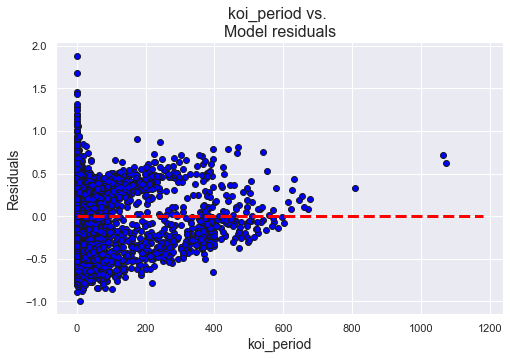

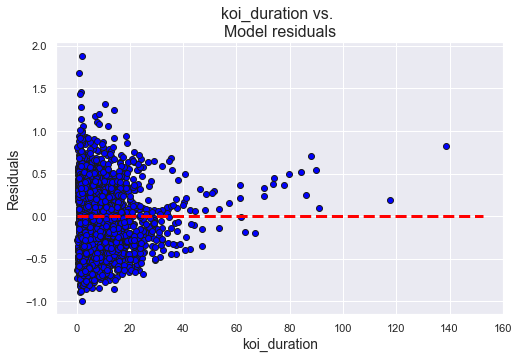

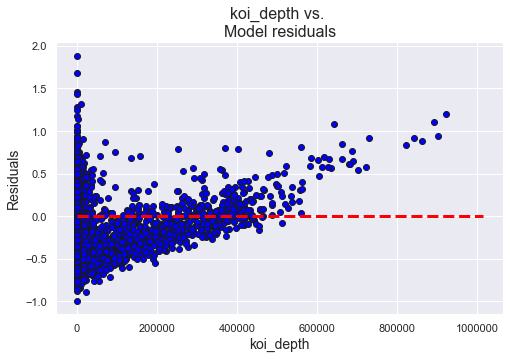

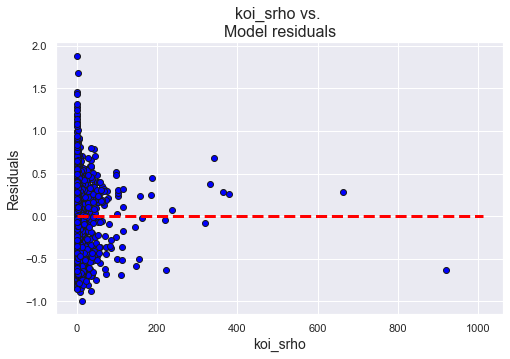

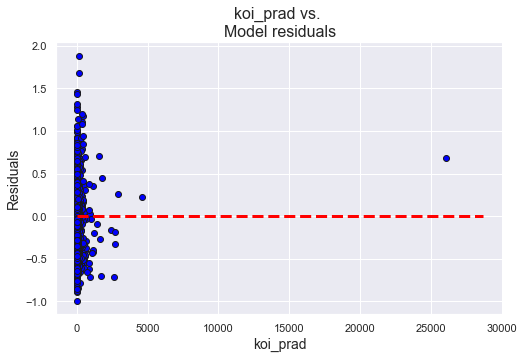

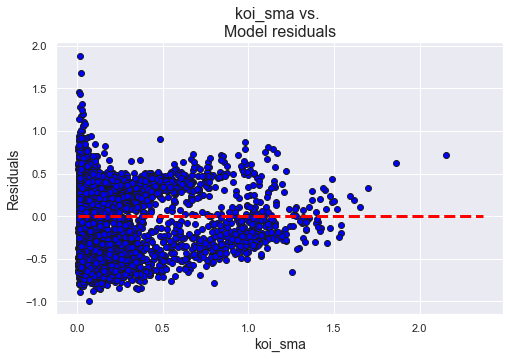

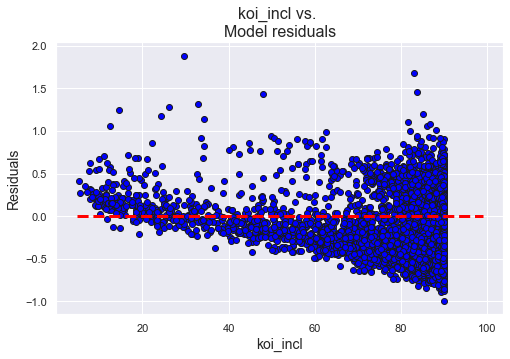

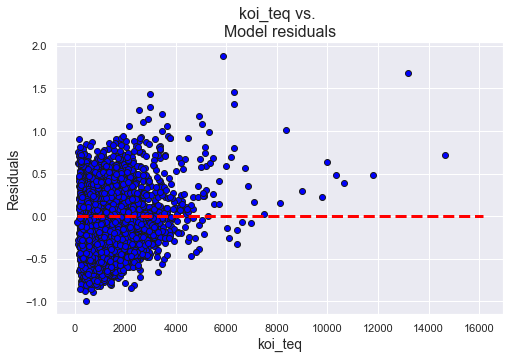

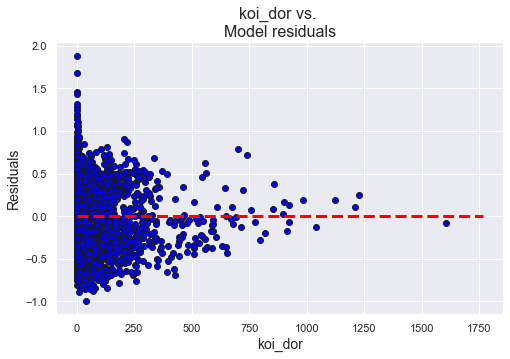

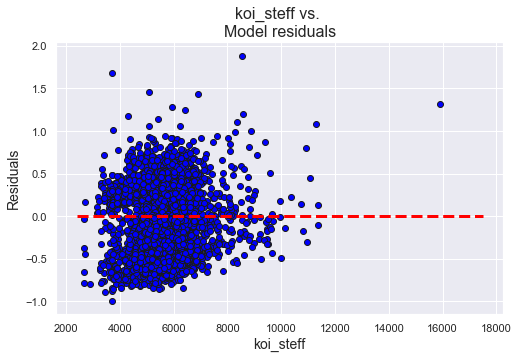

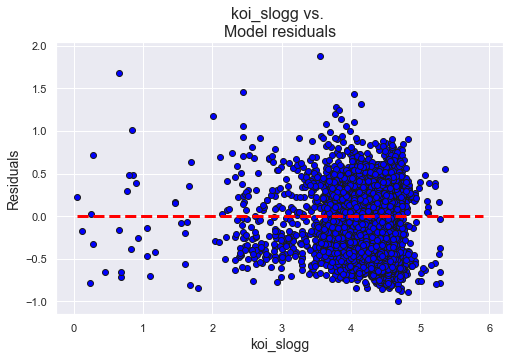

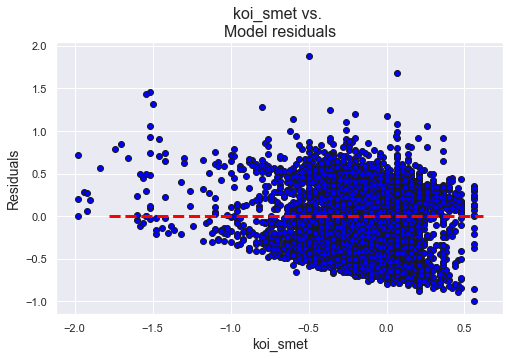

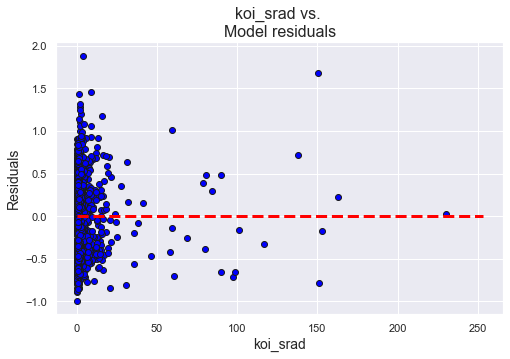

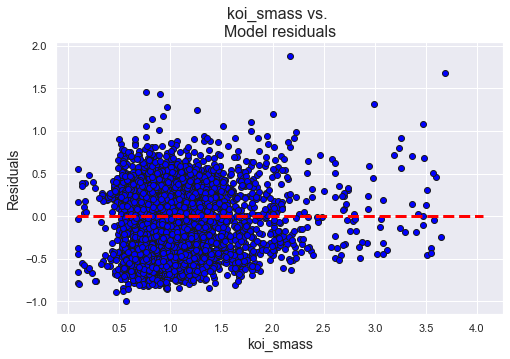

In [31]:
for d in nasadatareg[hisvarlist]:
    plt.figure(figsize=(8,5))
    plt.title("{} vs. \nModel residuals".format(d),fontsize=16)
    plt.scatter(x=nasadatareg[d],y=fitted.resid,color='blue',edgecolor='k')
    plt.grid(True)
    xmin=min(nasadatareg[d])
    xmax = max(nasadatareg[d])
    plt.hlines(y=0,xmin=xmin*0.9,xmax=xmax*1.1,color='red',linestyle='--',lw=3)
    plt.xlabel(d,fontsize=14)
    plt.ylabel('Residuals',fontsize=14)
    plt.show()

Residual plots show some bits of clustering. Some of them have an oblique line at the bottom, suggesting the residuals follow a slightly positive trend. These characteristics tell us that the residual are following some undesired pattern, and thus the assumption of homoscedasticity is violated. <br>

Also, this non-random pattern indicates that the deterministic portion of this model is not capturing the whole explanatory information that is affecting the residuals. Possibilities that could cause such patterns include:
* A missing variable
* A missing higher-order term of a variable in the model to explain the curvature
* A missing interaction between terms already in the model

Some of the plots also show residual outliers that are away from the main cluster.

#### Fitted vs. residuals

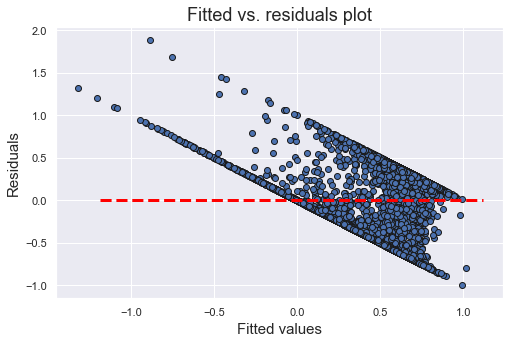

In [32]:
plt.figure(figsize=(8,5))
p=plt.scatter(x=fitted.fittedvalues,y=fitted.resid,edgecolor='k')
xmin=min(fitted.fittedvalues)
xmax = max(fitted.fittedvalues)
plt.hlines(y=0,xmin=xmin*0.9,xmax=xmax*1.1,color='red',linestyle='--',lw=3)
plt.xlabel("Fitted values",fontsize=15)
plt.ylabel("Residuals",fontsize=15)
plt.title("Fitted vs. residuals plot",fontsize=18)
plt.grid(True)
plt.show()

This plot looks pretty bad. Again, a clear negative trend of residuals vs. fitted values indicates that we must have omitted one or more variables from our model that could be account for this trend line. However, we couldn't know exactly which one(s) we missed.

### 2.2.2 Normality of residuals

We applied both raw residuals and standardized residuals for normality test.

#### 1. Histogram of standardized residuals

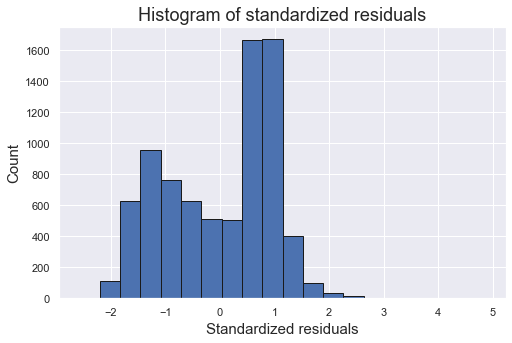

In [33]:
plt.figure(figsize=(8,5))
plt.hist(fitted.resid_pearson,bins=20,edgecolor='k')
plt.ylabel('Count',fontsize=15)
plt.xlabel('Standardized residuals',fontsize=15)
plt.title("Histogram of standardized residuals",fontsize=18)
plt.show()

The histogram shows that the normalized residuals are neither symmetric nor bell-shape distributed.

#### 2. Q-Q plot of the residuals

In [34]:
from statsmodels.graphics.gofplots import qqplot

<Figure size 576x360 with 0 Axes>

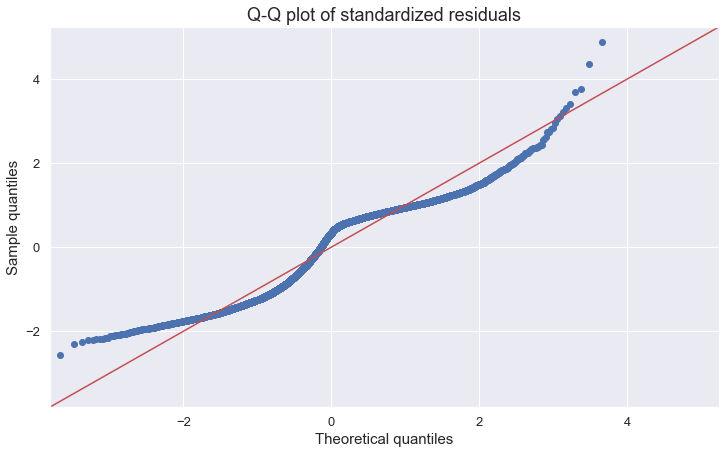

In [35]:
plt.figure(figsize=(8,5))
fig=qqplot(fitted.resid_pearson,line='45',fit='True')
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel("Theoretical quantiles",fontsize=15)
plt.ylabel("Sample quantiles",fontsize=15)
plt.title("Q-Q plot of standardized residuals",fontsize=18)
plt.grid(True)
plt.show()

The Q-Q plot shows that, although not perfectly aligned, the standardized residuals are generally following the diagnol reference line.

#### 3. Normality (Shapiro-Wilk) test of the residuals

In [36]:
from scipy.stats import shapiro

In [37]:
_,p=shapiro(fitted.resid)

C:\Users\gospelrecluse\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1660: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [38]:
if p<0.01:
    print("The residuals seem to follow normal distribution")
else:
    print("The normality assumption may not hold")

The residuals seem to follow normal distribution


Finally we used Shapiro-Wilk test for testing the normality. The test result shows the residuals are very likely following normal distribution.

### 2.2.3 Outliers detection

#### Cook's distance

In [39]:
from statsmodels.stats.outliers_influence import OLSInfluence as influence

In [40]:
inf=influence(fitted)

C:\Users\gospelrecluse\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  after removing the cwd from sys.path.


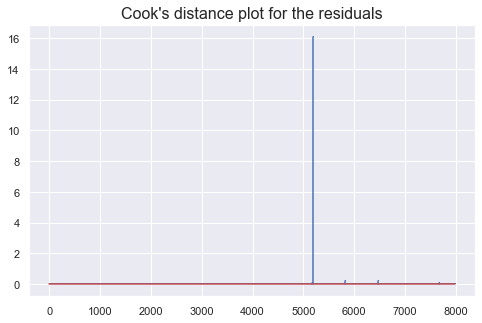

In [41]:
(c, p) = inf.cooks_distance
plt.figure(figsize=(8,5))
plt.title("Cook's distance plot for the residuals",fontsize=16)
plt.stem(np.arange(len(c)), c, markerfmt=",")
plt.grid(True)
plt.show()

Cook's distance is for outliers detection. As the plot shows, there is one significant outlier in our dataframe. In our future model improving process we will  remove this outlier and rerun the model to see how well our model could be improved.

### 2.2.4 Multicollinearity Detection

#### Variance inflation factor

In [42]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

In [43]:
for i in range(len(nasadatareg3.columns[1:])):
    v=vif(np.matrix(nasadatareg3[1:]),i)
    print("Variance inflation factor for {}: {}".format(nasadatareg3.columns[i],round(v,2)))

Variance inflation factor for koi_score: 1.52
Variance inflation factor for koi_period: 34.14
Variance inflation factor for koi_duration: 1.73
Variance inflation factor for koi_depth: 1.21
Variance inflation factor for koi_srho: 1.32
Variance inflation factor for koi_prad: 1.11
Variance inflation factor for koi_sma: 43.02
Variance inflation factor for koi_incl: 1.66
Variance inflation factor for koi_teq: 5.29
Variance inflation factor for koi_dor: 3.35
Variance inflation factor for koi_steff: 2.42
Variance inflation factor for koi_slogg: 4.44
Variance inflation factor for koi_smet: 1.36
Variance inflation factor for koi_srad: 2.12
Variance inflation factor for koi_smass: 4.9
Variance inflation factor for koi_fittype_LS: 9.32


There are two parameters with VIF > 10, thereby indicating significant multicollinearity. Because we intentionally included highly correlated exogenous variables in our model, this result is not beyond our expection.

### 2.2.5 Linear Model & Diagnosis Conclusion

We successfully built the model for predicting the koi_score of an astral body according to its own properties. However this model has several flaws that could be corrected in our future analysis.

* The heavily skewed distribution of each independent variables suggestes proper transformation may improve our model. This is also logically reasonable since the physcial laws applied for deriving the parameters of astral body require heavily transformations.


* Apart from the parameters we chose, we probably missed some key parameters in our model becasue
    * The Adj R-squared is quite low.
    * Most of the residual plots follow some patterns.


* There are outliers in our model, our model might be more stable (p-value decrease) after the outliers are removed from our dataset. 

### Section 3: Logistic Regression modeling under Statsmodel

Recall the pattern of the histogram of dependent variable (koi_score), vast majority of the observations are 0 and 1. We consider Logistic Regression might perform better than linear regression model.

### 2.3.1 Descriptive Statistics

In [44]:
nasadatalogvar=nasarawdata[regvarlist].copy()

For logistic regression, the outcomes are binary values (e.g. 1 or 0, Yes or No). Therefore, we dichotomize the koi_score into 0 or 1 according the criteria: koi_score value above 0.5 will be assigned value 1, otherwise it will be assigned value 0.

In [45]:
#Dichotomize koi_score
nasadatalogvar['score_bi']=nasadatalogvar['koi_score'].apply(lambda x:0 if x<=0.5 else 1)

In [46]:
#Row-wise drop null values
nasadatalog=nasadatalogvar.dropna()

In [47]:
nasadatalog['score_bi'].value_counts()

0    4076
1    3913
Name: score_bi, dtype: int64

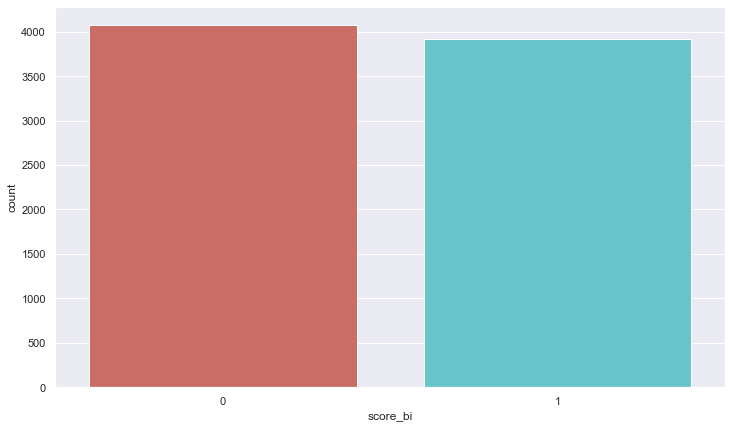

In [48]:
sns.countplot(x='score_bi', data=nasadatalog, palette='hls')
plt.show()

In total, we have 7989 observations with complete observation values.
<br>
The two groups looks well balanced, there is no need for oversampling to balance the groups.

In [49]:
meancomparison=nasadatalog.groupby('score_bi').mean()

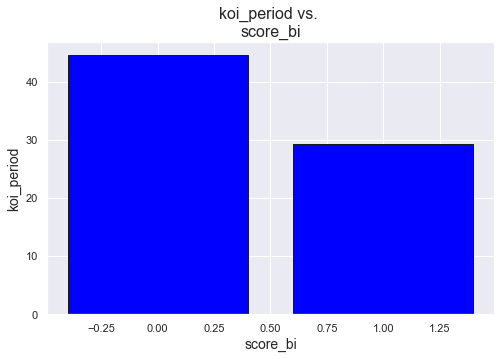

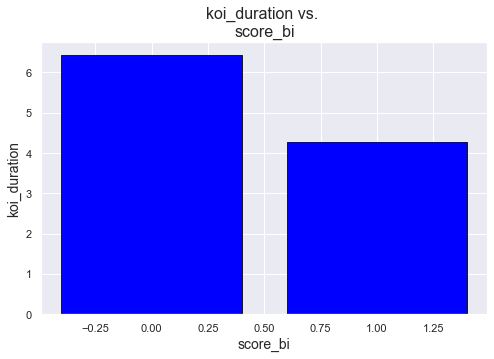

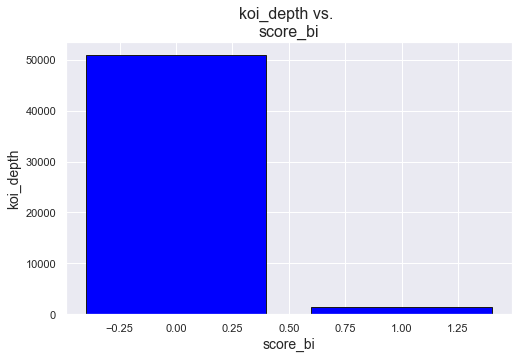

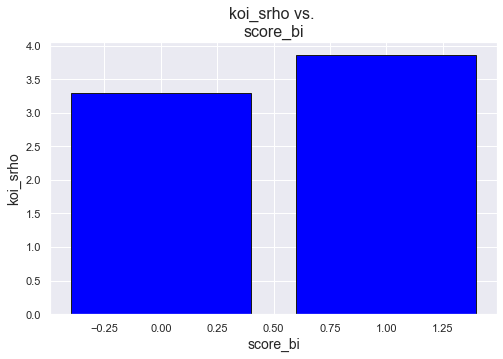

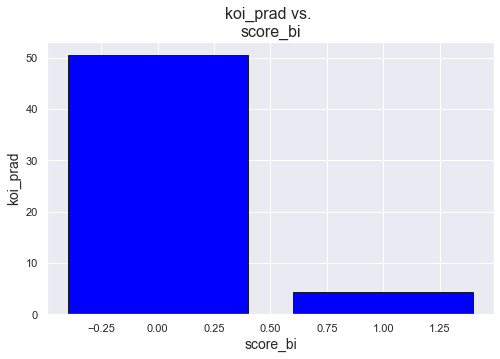

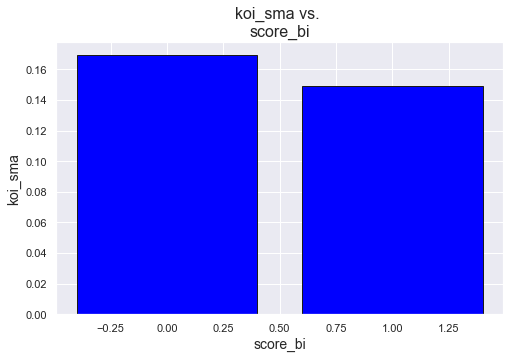

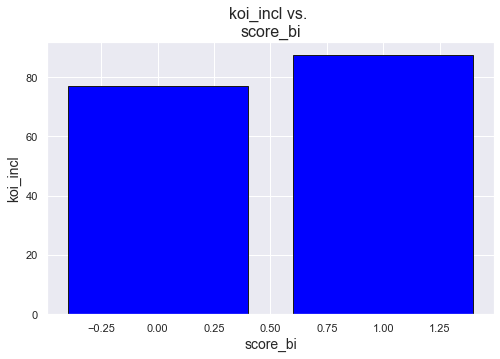

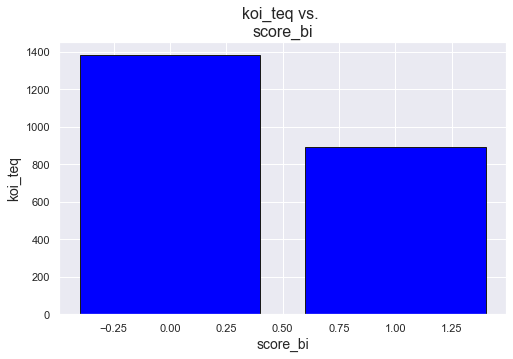

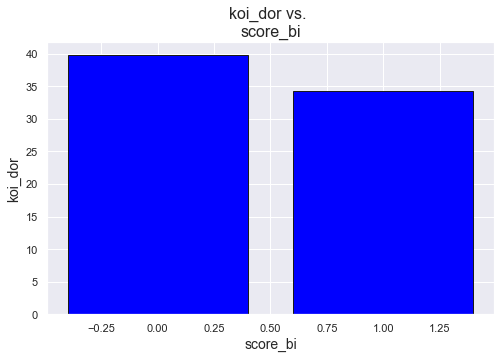

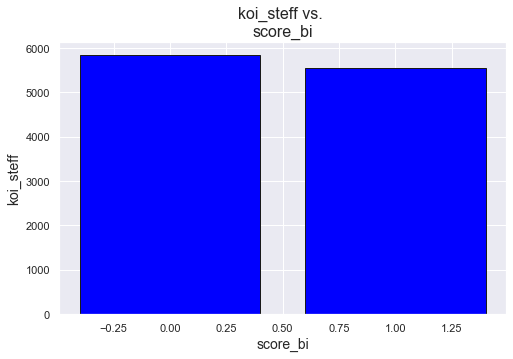

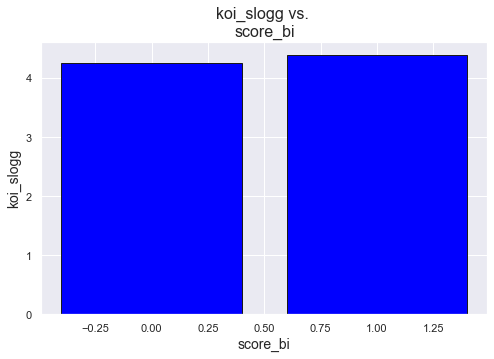

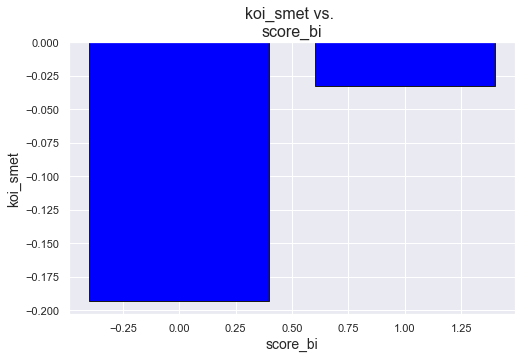

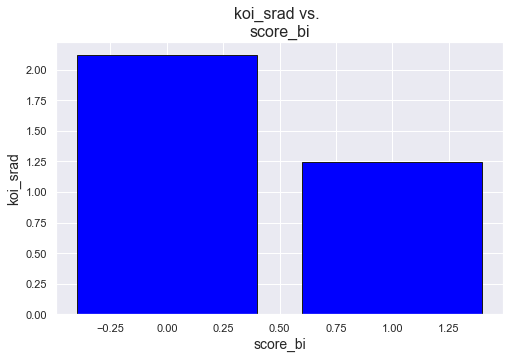

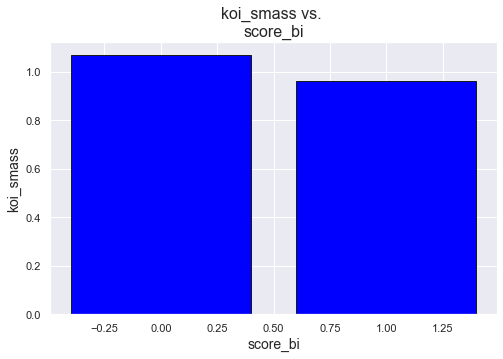

In [50]:
for i in meancomparison.columns[1:]:
    plt.figure(figsize=(8,5))
    plt.title("{} vs. \nscore_bi".format(i),fontsize=16)
    plt.bar(meancomparison.index,meancomparison[i],color='blue',edgecolor='k')
    plt.grid(True)
    plt.ylabel(i,fontsize=14)
    plt.xlabel('score_bi',fontsize=14)
    plt.show()

We plotted the bar charts of two score group means to do a naked eye evalutation of, for each variable, the existance of distinguishable difference between two groups.

Considering the magnitutde of Y-axis, we can only conclude that the mean value of *koi_depth* in two score groups are substantially different.

For more statistical conclusions, we will rely on two sample t-test to determine if there exists statistical difference between two groups for each independent variable.

#### Two sample t-test

Before applying the two sample t-test, we have to determine if the variances of the two groups are equal.<br>
Recall the histogram of each dependent variable, most of them are heavily skewed, Levene Test is robust for this situation.
The process is 
* Applying Levene Test to determine the equality of variance.
* Determine the equal_var argument based on the Levene Test result and perform preferred tests.

In [51]:
import scipy.stats as ss
from scipy.stats import levene

In [52]:
nasadatalog.groupby('score_bi').mean()

koi_score  koi_period  koi_duration     koi_depth  koi_srho  \
score_bi                                                                
0          0.023780   44.546142      6.424028  50870.711335  3.300469   
1          0.963371   29.337397      4.263362   1455.124099  3.856387   

           koi_prad   koi_sma   koi_incl      koi_teq    koi_dor    koi_steff  \
score_bi                                                                        
0         50.443724  0.169181  76.938999  1382.099853  39.776035  5836.112365   
1          4.339284  0.149392  87.382527   890.582162  34.275426  5541.223358   

          koi_slogg  koi_smet  koi_srad  koi_smass  
score_bi                                            
0          4.257579 -0.193133  2.118603   1.067759  
1          4.385098 -0.032239  1.245671   0.960582

In [53]:
twos_ttest=[]
for i in hisvarlist:
    #Variables 'koi_steff','koi_smet' and 'koi_smass' are not so heavily skewed, set center argument to 'median'
    if i in ['koi_steff','koi_smet','koi_smass']:
        if levene(nasadatalog[nasadatalog['score_bi']==1][i],
                  nasadatalog[nasadatalog['score_bi']==0][i],center='median').pvalue<0.05:
            #If p-value is less than 0.05, variances of two groups are considered unequal
            twos_ttest.append([i,ss.ttest_ind(a=nasadatalog[nasadatalog['score_bi']==1][i],
                                             b=nasadatalog[nasadatalog['score_bi']==0][i], equal_var=False).pvalue])
        else:
            #Otherwise two groups are considered equal
            twos_ttest.append([i,ss.ttest_ind(a=nasadatalog[nasadatalog['score_bi']==1][i],
                                             b=nasadatalog[nasadatalog['score_bi']==0][i], equal_var=True).pvalue])
    #Except those three variables, the rest variables are heavily skewed, set center argument to 'trimmed'
    else:
        if levene(nasadatalog[nasadatalog['score_bi']==1][i],
                  nasadatalog[nasadatalog['score_bi']==0][i],center='trimmed').pvalue<0.05:
            twos_ttest.append([i,ss.ttest_ind(a=nasadatalog[nasadatalog['score_bi']==1][i],
                                             b=nasadatalog[nasadatalog['score_bi']==0][i], equal_var=False).pvalue])
        else:
            twos_ttest.append([i,ss.ttest_ind(a=nasadatalog[nasadatalog['score_bi']==1][i],
                                             b=nasadatalog[nasadatalog['score_bi']==0][i], equal_var=True).pvalue])

In [54]:
df_twos_ttest=pd.DataFrame(twos_ttest,columns=['Parameter','p-value'])
df_twos_ttest['p<0.05']=df_twos_ttest['p-value'].apply(lambda x:'Yes' if x <0.05 else 'No')
df_twos_ttest.set_index('Parameter')

p-value p<0.05
Parameter                         
koi_period     1.912321e-15    Yes
koi_duration   8.206060e-55    Yes
koi_depth     9.336734e-155    Yes
koi_srho       1.760987e-01     No
koi_prad       1.655999e-11    Yes
koi_sma        1.647912e-04    Yes
koi_incl      1.050872e-218    Yes
koi_teq       1.997111e-157    Yes
koi_dor        2.250314e-03    Yes
koi_steff      2.160680e-64    Yes
koi_slogg      1.131581e-42    Yes
koi_smet      1.955303e-153    Yes
koi_srad       9.526592e-11    Yes
koi_smass      2.012901e-46    Yes

*koi_srho*, the stellar density, is the only one that no statistically significant difference exists in two score groups. 

Similar to what we've done in linear model, we value the literature reivewed model more and this variable will still be included into our saturated model.

### 2.3.2 Modeling

We use **logit model** under statsmodel, discrete_model library for modeling logistic regression.

In [55]:
import statsmodels.discrete.discrete_model as smdd

In [56]:
nasadatalog2=pd.get_dummies(nasadatalog)

In [57]:
varlist=['koi_period','koi_duration','koi_depth','koi_srho','koi_prad','koi_sma','koi_incl','koi_teq','koi_dor',
         'koi_steff','koi_slogg','koi_smet','koi_srad','koi_smass','koi_fittype_LS+MCMC']

In [58]:
X=sm.add_constant(nasadatalog2[varlist])
y=nasadatalog2['score_bi']

C:\Users\gospelrecluse\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [59]:
logit_model1=smdd.Logit(y,X)
result=logit_model1.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.419215
         Iterations 10
                           Results: Logit
Model:                Logit             Pseudo R-squared:  0.395    
Dependent Variable:   score_bi          AIC:               6730.2194
Date:                 2019-12-12 10:44  BIC:               6841.9926
No. Observations:     7989              Log-Likelihood:    -3349.1  
Df Model:             15                LL-Null:           -5535.9  
Df Residuals:         7973              LLR p-value:       0.0000   
Converged:            1.0000            Scale:             1.0000   
No. Iterations:       10.0000                                       
--------------------------------------------------------------------
                     Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
--------------------------------------------------------------------
const                3.4623   1.1503   3.0100 0.0026  1.2078  5.7168
koi_period          -0.0061

C:\Users\gospelrecluse\Anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1736: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))


To our surprise, the p-value for koi_srho is 0.9306, which is too great and meaning this variable makes almost no contribution for the outcome classification. We decide to remove it from the saturated model and rerun the reduced model.

In [60]:
varlist2=['koi_period','koi_duration','koi_depth','koi_prad','koi_sma','koi_incl','koi_teq','koi_dor',
         'koi_steff','koi_slogg','koi_smet','koi_srad','koi_smass','koi_fittype_LS+MCMC']

In [61]:
X2=sm.add_constant(nasadatalog2[varlist2])
y2=nasadatalog2['score_bi']

In [62]:
logit_model2=smdd.Logit(y2,X2)
result=logit_model2.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.419216
         Iterations 10
                           Results: Logit
Model:                Logit             Pseudo R-squared:  0.395    
Dependent Variable:   score_bi          AIC:               6728.2270
Date:                 2019-12-12 10:44  BIC:               6833.0143
No. Observations:     7989              Log-Likelihood:    -3349.1  
Df Model:             14                LL-Null:           -5535.9  
Df Residuals:         7974              LLR p-value:       0.0000   
Converged:            1.0000            Scale:             1.0000   
No. Iterations:       10.0000                                       
--------------------------------------------------------------------
                     Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
--------------------------------------------------------------------
const                3.4630   1.1502   3.0107 0.0026  1.2086  5.7175
koi_period          -0.0061

The AIC decreased and Log-Likelihood didn't change, meaning this reduced model is better than the saturated model. Although koi_sma is not significant, we consider this p-value level is accpetable and keep it as our finalized our model.
<br>

Using koi_steff and koi_fittype as two examples,the interpretations of our model are as follow.

* koi_teq<br>
On average, for each Kelvin unit increase in planet temperature while holding other variables constant, the **log odds ratio of koi_score=1 over koi_score=0** will be decreased by 0.0018.


* koi_fittype_LS+MCMC<br>
Hypothetically, on average, for an identical astral body, LS+MCMC fitting method will have 1.6369 unit higher **log odds ratio of koi_score=1 over koi_score=0** than LS fitting method.

### 2.3.3 Logistic Model Conclusion

* The logistic regression model has some improvements when compared to the linear regression model: 
    * Imporved Adj R-square.
    * Decreased p-values. 


* There is one major limitation in this model. The way we dichotomize the koi_score eliminates the magnitute of tendency. For example, A koi object having score 0.99 is different to a koi object having score 0.51, but due to our dichotomization, their intrinsic difference is eliminated. 


* Similar to the linear regression model, the logistic model could be improved by: 
    * Applying transformation on independent variables.
    * Adding the missing variables.
    * Excluding the outliers. 

### Section 4: Machine Learning under SciKit Learn

We also want to know how well our logistic model is. One of the verification methods is to use machine learning technology and find out the prediction accruancy.

In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

### 2.4.1 Prediction Accuracy

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.3, random_state=111111)
logreg = LogisticRegression(solver='liblinear')
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [65]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.81


The predicting accuracy is way better than we thought, about 0.81.

### 2.4.2 ROC Curve

Another way to visualize how well the model in prediction is to plot the ROC Curve.
<br>
The receiver operating characteristic (ROC) curve is another common tool used with binary classifiers. The dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner).

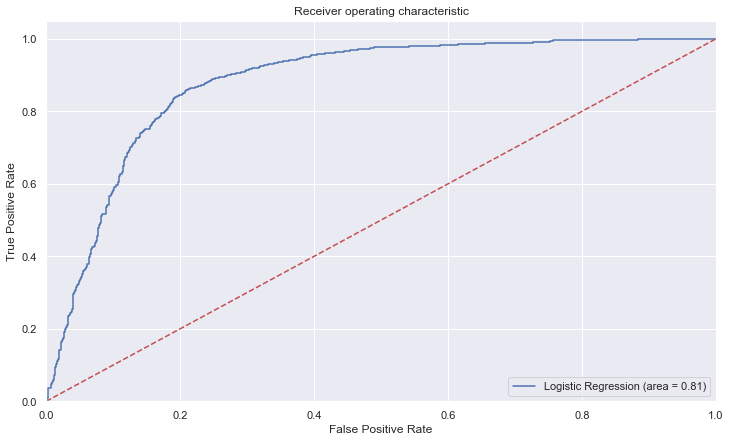

In [66]:
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

## Objective 3: Predicting the undetermined koi_score

The last objective is to use our regression model to predict the undetermined koi_score, through which, we can classify the kepler is a candidate or not.

In [67]:
#Finding the rows which have missing value for koi_score:
miss_score=nasarawdata[nasarawdata.koi_score.isnull()]
to_predict=miss_score[regvarlist].copy()

In [68]:
#Filtering out the rows that have missing value only for the koi_score column.
to_predict=to_predict[to_predict.isnull().sum(axis=1)<2]
to_predict.head()

koi_score  koi_period  koi_duration  koi_depth  koi_srho koi_fittype  \
24         NaN  386.603053        6.8057    24900.0   4.63335        MCMC   
75         NaN   14.179819        2.5050      460.0   7.76746        MCMC   
99         NaN   29.159861        4.8030      488.0   1.92739        MCMC   
123        NaN    1.028437        1.8606     8100.0   0.43236        MCMC   
318        NaN  856.672115       23.1440      858.0   0.61949        MCMC   

     koi_prad  koi_sma  koi_incl  koi_teq  koi_dor  koi_steff  koi_slogg  \
24      41.50   1.0719     89.95    297.0  332.000     5543.0      4.081   
75       1.88   0.1137     89.95    711.0   43.540     5799.0      4.539   
99       1.91   0.1847     89.38    524.0   44.200     5485.0      4.556   
123     72.77   0.0197     57.30   1947.0    2.891     6228.0      4.428   
318      3.87   1.8045     89.95    242.0  288.600     6449.0      4.232   

     koi_smet  koi_srad  koi_smass  
24       0.44     1.580      1.103  
75      -0.10     0.878      0.975  
99       0.21     0.867      0.986  
123     -0.44     0.990      0.959  
318     -0.32     1.309      1.063

We find something anormal, the koi_fittype is *'MCMC'* type, which does not exist in our modeling dataset. 

In [69]:
to_predict.koi_fittype.value_counts()

MCMC    1188
Name: koi_fittype, dtype: int64

The worst case happen. The 'for prediction' dataset has one completely different feature to the modeling dataset: the koi_fittype that exists is only *'MCMC'*, and our model does not have a parameter coefficient for koi_fittype=MCMC. Therefore, we cannot use our model to predict the missing score because of the data structure mismatch.

# Final Conclusions & Thoughts

In conclusion, we were surprised and satisfied with the well performance in prediction of our logistic model. For a given astral body with sufficient parameters, we could use this logistic model to predict in which category this astral body will likely to fall with 81% accuracy.

However, the logistic model itself, as well as the linear model, is still not good and requires improvements.

* As we mentioned before, there are at least three major flaws wihtin our dataset and modeling procedure.
    * Variable transformations
    * Missing explanatory variable(s)
    * Outliers

    We might generate more robust models after we addressed those issues.
    

* Although we did heavy works on literature review, we found it is not enough for us to improve our model.
    1. We narrowed down the variable scope to the categories **'Transit Properties'** and **'Stellar Parameters'**. Depsite unselected variables within our pre-determined variable scope, the omitted variables may be outside this scope. 
        * Other categories describing other aspects of an astral body.
            * **Threshold-Crossing Event (TCE) Information**
            * **KIC Parameters**
            * **Pixel-Based KOI Vetting Statistics**
    2. Understanding the terminologies of Cosmology and Astrophysics is challenging. The authors assume readers have knowledges about them, unfortunately we are not their target readers.
    3. Figuring out proper transformations for our independent variables is associated with understanding the physical laws, and we don't have a member who is familiar with that.

    To further improve our model, maybe we should ask help from a professional astronomer.
    

* We tried linear model (link function=identity) and logit model (link function=logit). We found logit link function is better than identity link function. However, there maybe other link functions that can perform much better than those two functions. In our future step, we can do box-cox transformation analysis (data-driven analysis) and take physical laws into consideration (theory-driven analysis) to find out a best-fit link function to connect the independent variables and dependent variable.

# Reference

* **Data source & Data dictionary**
    1. NASA Exoplanet Archive<br>
        https://exoplanetarchive.ipac.caltech.edu/docs/data.html
    2. Data Columns in Kepler Objects of Interest Table<br>
        https://exoplanetarchive.ipac.caltech.edu/docs/API_kepcandidate_columns.html


* **Literature**
    1. *The NASA Exoplanet Archive: Data and Tools for Exoplanet Research*<br>
        R. L. Akeson, X. Chen, D. Ciardi, M. Crane, J. Good, M. Harbut, E. Jackson, S. R. Kane, A. C. Laity, S. Leifer<br>
        https://iopscience.iop.org/article/10.1086/672273/meta
    2. *Exploring exoplanet populations with NASA’s Kepler Mission*<br>
        Natalie M. Batalha<br>
        https://www.pnas.org/content/111/35/12647.full
    3. *Improved Parameters for Extrasolar Transiting Planets*<br>
        Guillermo Torres, Joshua N. Winn, and Matthew J. Holman<br>
        https://iopscience.iop.org/article/10.1086/529429/meta
    4. *Improving Stellar and Planetary Parameters of Transiting Planet Systems: The Case of TrES-2*<br>
        Alessandro Sozzetti, Guillermo Torres, David Charbonneau, David W. Latham, Matthew J. Holman, Joshua N. Winn, John B. Laird, and Francis T. O'Donovan<br>
        https://iopscience.iop.org/article/10.1086/519214/meta
    5. *The Transit Light Curve (TLC) Project. VI. Three Transits of the Exoplanet TrES-2*<br>
        Matthew J. Holman, Joshua N. Winn, David W. Latham, Francis T. O'Donovan, David Charbonneau, Guillermo Torres, Alessandro Sozzetti, Jose Fernandez, and Mark E. Everett<br>
        https://iopscience.iop.org/article/10.1086/519077/meta


* **Python coding tutorials**
    1. *Machine-Learning-with-Python*<br>
        tirthajyoti<br>
        https://github.com/tirthajyoti/Machine-Learning-with-Python/blob/master/Regression/Regression_Diagnostics.ipynb
    2. *Regression diagnostics*<br>
        http://www.statsmodels.org/devel/examples/notebooks/generated/regression_diagnostics.html
    3. *Linear Regression Diagnostic in Python with StatsModels*<br>
        Zhiya Zuo<br>
        https://zhiyzuo.github.io/Linear-Regression-Diagnostic-in-Python/
    4. *Building A Logistic Regression in Python, Step by Step*<br>
        Susan Li<br>
    https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8
    5. *Logistic Regression in Sci-Kit Learn*<br>
        Stephen Barter<br>
        https://blog.goodaudience.com/classifying-flowers-using-logistic-regression-in-sci-kit-learn-38262416e4c6 